# Tensorflow API Study
### 파이썬 딥러닝 파이토치 책의 예제를 참고함.
2023.09.01

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

#### 0) Dummy data

In [10]:
x = np.arange(1,6)

y =3*x + 2

#### 1) 모델 정의 단계
1. 순차적 정의
2. add() 메서드를 통한 레이어 추가

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5)
])
model.add(tf.keras.layers.Dense(1))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 예제용 단순선형회귀 모델
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#### 2) 컴파일 단계
- optimizer, loss, metrics 를 정의
- 클래스 인스턴스, 함수, 사전 정의된 문자열 로 지정 가능.

In [6]:
# 긴 문자열 지정
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [7]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mse','mae'])

In [21]:
# 예제용 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 3) 학습
- 생성한 모델 인스턴스에 fit() 메소드를 적용해 훈련.
- fit()에 입력 데이터, 정답, epoch 수 지정.
- verbose = 0 지정 시 훈련 과정을 출력하지 않는다.
- validation_data 옵션 지정 시, valid_set 에 대한 loss와 metric 도 함께 출력한다.

In [22]:
result = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 451ms/step - loss: 266.1066 - mae: 15.0989
Epoch 2/1200
1/1 [==============================] - 0s 14ms/step - loss: 155.1140 - mae: 11.5552
Epoch 3/1200
1/1 [==============================] - 0s 6ms/step - loss: 90.4328 - mae: 8.8499
Epoch 4/1200
1/1 [==============================] - 0s 7ms/step - loss: 52.7395 - mae: 6.7846
Epoch 5/1200
1/1 [==============================] - 0s 6ms/step - loss: 30.7734 - mae: 5.2079
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 17.9724 - mae: 4.0041
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 10.5124 - mae: 3.0852
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 6.1648 - mae: 2.3835
Epoch 9/1200
1/1 [==============================] - 0s 6ms/step - loss: 3.6309 - mae: 1.8478
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.1541 - mae: 1.4388
Epoch 11/1200
1/1 [==============================] - 0

##### 3-1) 학습 history 확인

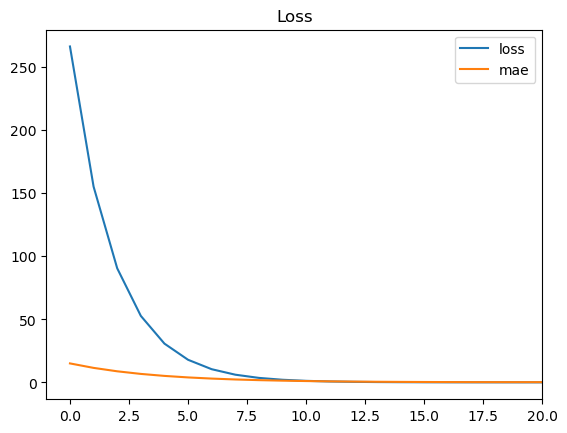

In [23]:
import matplotlib.pyplot as plt

# 20 epoch 까지 loss 수렴에 대한 시각화
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

#### 4) 검증
- 검증 데이터셋을 입력으로 모델 인스턴스의 .evaluate() 메서드로 저렇게 검증 가능.

In [26]:
model.evaluate(x,y)

1/1 [==============================] - 0s 31ms/step - loss: 2.8965e-05 - mae: 0.0046


[2.896520345530007e-05, 0.004619502928107977]

#### 5) 예측
- model.predict(x)

In [35]:
print(model.predict([-10, 97]))

# 주어진 데이터의 패턴을 잘 파악해 저런 예측을 했음. good 
# 사실 데이터분포를 알고 모델의 구조를 정의해 이렇게 완벽에 가깝게 예측하는거긴 하지만.

1/1 [==============================] - 0s 51ms/step
[[-28.047556]
 [293.32632 ]]
